In [1]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import PIL
import numpy as np

/opt/conda/envs/medical-imaging-playground-env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the panoramic X-ray dataset
ds = load_dataset("SerdarHelli/SegmentationOfTeethPanoramicXRayImages", split="train")
ds

Dataset({
    features: ['image', 'label'],
    num_rows: 116
})

In [3]:
# Inspect the first sample
example = ds[0]
image = example["image"]
mask = example["label"]

In [4]:
def plot_image(image: PIL.JpegImagePlugin.JpegImageFile, title, ax=None):
    """Plot a panoramic X-ray image with optional external Axes."""
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))
    ax.imshow(image, cmap="gray")
    ax.set_title(title)
    ax.axis("off")
    if ax is None:
        plt.show()

def plot_overlay(
        image: PIL.JpegImagePlugin.JpegImageFile,
        mask: PIL.JpegImagePlugin.JpegImageFile,
        title,
        ax=None,
):

    # Convert the PIL image to a NumPy array
    img_array = np.array(image)
    mask_array = np.array(mask)

    # Ensure mask has same shape as image (height x width)
    # If the image is RGB and mask is 2D, this is fine.
    # If mask values are not {0, 1}, normalize them:
    mask_array = (mask_array > 0).astype(np.uint8)

    # Plot overlay
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))
    ax.imshow(img_array, cmap="gray")               # base image
    ax.imshow(mask_array, cmap="jet", alpha=0.4)    # overlay (semi-transparent color)
    ax.axis("off")
    ax.set_title(title)
    if ax is None:
        plt.show()

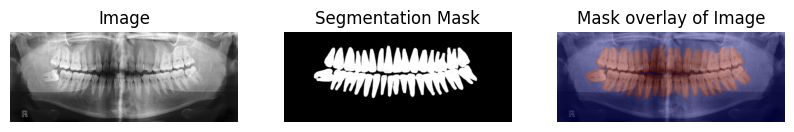

In [5]:
fig, ax = plt.subplots(1,3, figsize=(10,5))
plot_image(image, ax=ax[0], title="Image")
plot_image(mask, ax=ax[1], title="Segmentation Mask")
plot_overlay(image=image, mask=mask, ax=ax[2], title="Mask overlay of Image")

47


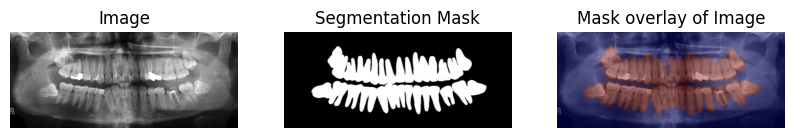

83


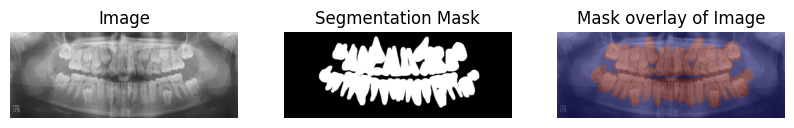

38


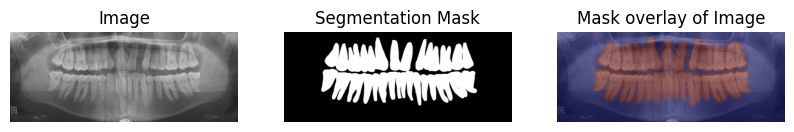

53


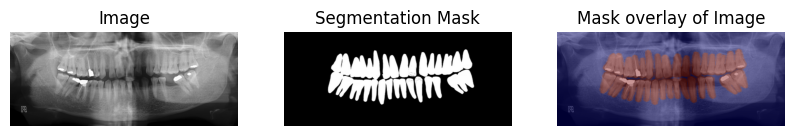

76


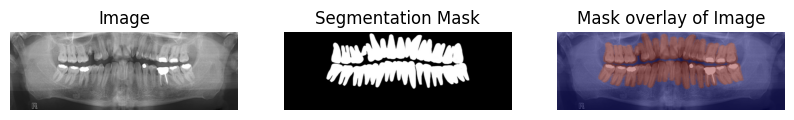

24


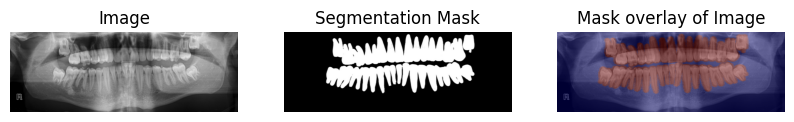

15


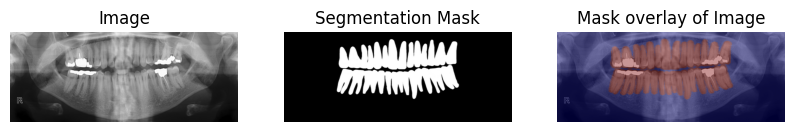

49


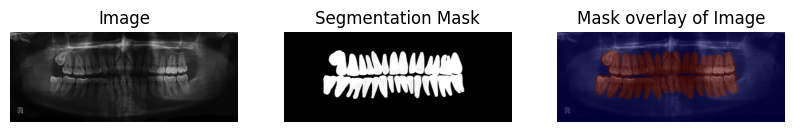

23


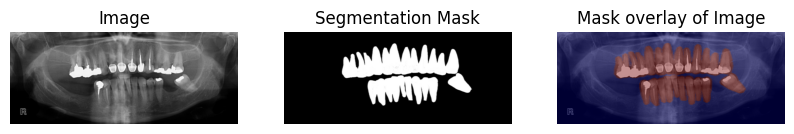

105


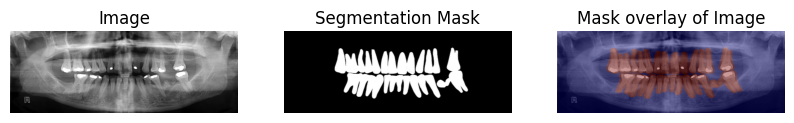

In [6]:
np.random.seed(1234)
ids = np.random.randint(low=0, high=len(ds), size=10)
for id in ids:
    print(id)
    example = ds[id]
    image = example["image"]
    mask = example["label"]

    fig, ax = plt.subplots(1,3, figsize=(10,5))
    plot_image(image, ax=ax[0], title="Image")
    plot_image(mask, ax=ax[1], title="Segmentation Mask")
    plot_overlay(image=image, mask=mask, ax=ax[2], title="Mask overlay of Image")
    plt.show()